In [ ]:
#importing necessary libraries
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#uploading dataset using files upload -- job_dataset.csv.zip
uploaded = files.upload()

Saving job_dataset.csv.zip to job_dataset.csv (3).zip


In [ ]:
pdInputData = pd.read_csv("job_dataset.csv.zip", index_col = None)
pdInputData.head()

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,Date_Since_Posted,Description,Location,Company_Revenue,Company_Employees,Company_Industry,python,sql,machine learning,r,hadoop,tableau,sas,spark,java,Others,CA,NY,VA,TX,MA,IL,WA,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,1.0,"[<p><b>POSITION SUMMARY</b></p>, <p>\r\r\nThe ...",MO,More than $10B (USD),"10,000+",Health Care,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,NaN,NaN,15.0,"[<p><b>What do we need?</b></p>, <ul><li>\r\r\...",TX,NaN,NaN,NaN,1,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,62.0,3.5,1.0,"[<ul><li>Validate, analyze, and conduct statis...",OR,NaN,NaN,NaN,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4.3,30.0,"[<p>Full time</p>, <p>Washington, DC metro are...",DC,NaN,NaN,Government,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495.0,4.1,30.0,[<ul><li>Assist in consultations with business...,TX,NaN,"Less than 10,000",Banks and Financial Services,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


# Top 10 Industries

In [ ]:
#defining the value counts across different industries
industries = pdInputData['Company_Industry'].value_counts().head(10)
company_industry = pd.DataFrame(industries)
company_industry.index.name= 'Industry Name'
company_industry

new_industries = company_industry.reset_index()
comp_industry = new_industries.rename(columns={'Company_Industry':'Available Jobs'})
comp_industry

,Industry Name,Available Jobs
0,Consulting and Business Services,733
1,Internet and Software,647
2,Banks and Financial Services,459
3,Health Care,339
4,Insurance,227
5,Industrial Manufacturing,153
6,Aerospace and Defense,129
7,Retail,122
8,Education and Schools,121
9,Computers and Electronics,99


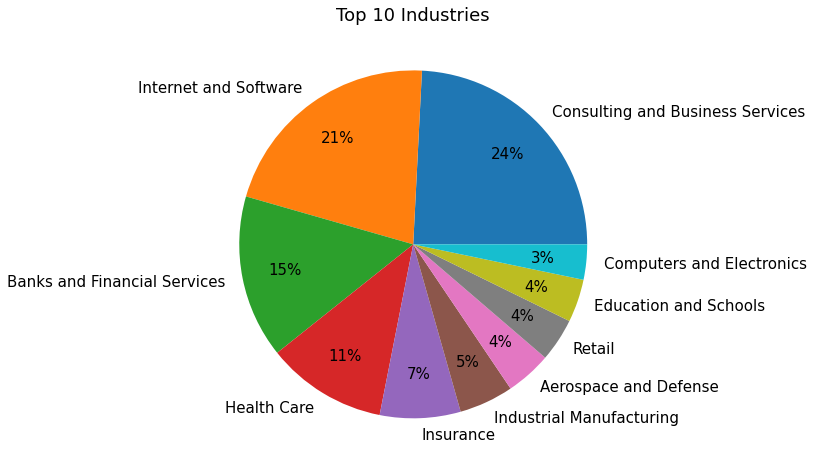

In [ ]:
#plotting pie chart for top 10 industries
comp_industry = comp_industry.head(10)
comp_industry
fig, ax = plt.subplots(figsize=(8,8))

ax.set_title('Top 10 Industries',fontsize="18")
plt.pie(comp_industry['Available Jobs'] , autopct = '%0.f%%',pctdistance=0.75,textprops={'fontsize': 15}, labels = comp_industry['Industry Name']);

# Number of Skills Counts

In [ ]:
# #plotting countplot for no of skills
# fig = plt.figure(figsize=(12,10))
# sns.set_style("darkgrid")
# sns.countplot(x = "No_of_Skills", data = pdInputData)
# plt.title("Number of Skills")
# plt.show()

# Top 10 Job Locations

In [ ]:
#defining top 10 value counts for locations
pdInputData['Location'].value_counts().head(10)

CA    1395
NY     601
VA     334
TX     329
MA     271
IL     240
WA     222
MD     169
DC     140
GA     139
Name: Location, dtype: int64

Text(0.5, 1.0, 'Jobs per Location')

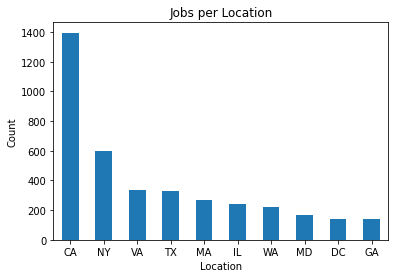

In [ ]:
#plotting bar graph for job counts across top 10 locations
pdInputData['Location'].value_counts().head(10).plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.xlabel("Location")
plt.title("Jobs per Location")

Conclusion: As we can see from the above visualization , California (CA) by far has the largest job market followed by NewYork(NY) & Virginia (VA)

# Job Types

In [ ]:
#defining value counts for job types
JT = pdInputData['Job_Type'].value_counts()
job_type_count = pd.DataFrame(JT)
job_type_count

,Job_Type
data_scientist,2543
data_analyst,1793
data_engineer,1379


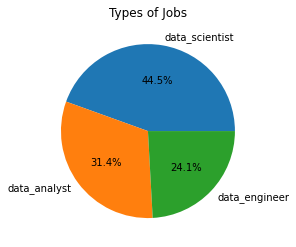

In [ ]:
#plotting a pie chart to visualize job types
plt.pie(job_type_count['Job_Type'], labels = job_type_count.index , autopct = "%1.1f%%")
plt.title("Types of Jobs")
plt.show()

# Top 10 Companies

In [ ]:
#defining top 10 companies by value
company = pdInputData['Company'].value_counts().head(10)
company_count = pd.DataFrame(company)
company_count

,Company
Booz Allen Hamilton,151
Harnham,87
Capgemini,84
Facebook,65
KPMG LLP,64
Walmart,59
Capital One,54
JPMorgan Chase,51
Google,40
IBM,38


Text(0.5, 1.0, 'Top 10 Companies')

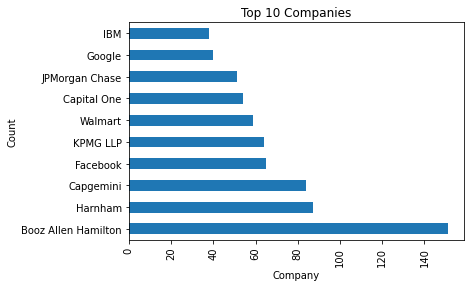

In [ ]:
#ploting bar chart to visualize top 10 companies
pdInputData['Company'].value_counts().head(10).plot(kind='barh')
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.xlabel("Company")
plt.title("Top 10 Companies")

# Skills across each Job Type

In [ ]:
#locating the value counts for skills by job types
skills_data = pdInputData.set_index('Job_Type')
jobs_by_skills = skills_data.loc[['data_scientist','data_engineer','data_analyst'],
                            ['python','sql','machine learning', 'r', 'hadoop', 'tableau', 'sas', 'spark', 'java']]
jobs_across_type = jobs_by_skills.groupby('Job_Type')
jobs_across_type.sum()

,python,sql,machine learning,r,hadoop,tableau,sas,spark,java
Job_Type,,,,,,,,,
data_analyst,512,1044,166,456,126,538,310,67,101
data_engineer,901,867,289,228,761,214,67,719,704
data_scientist,1912,1193,1842,1550,827,484,564,745,675


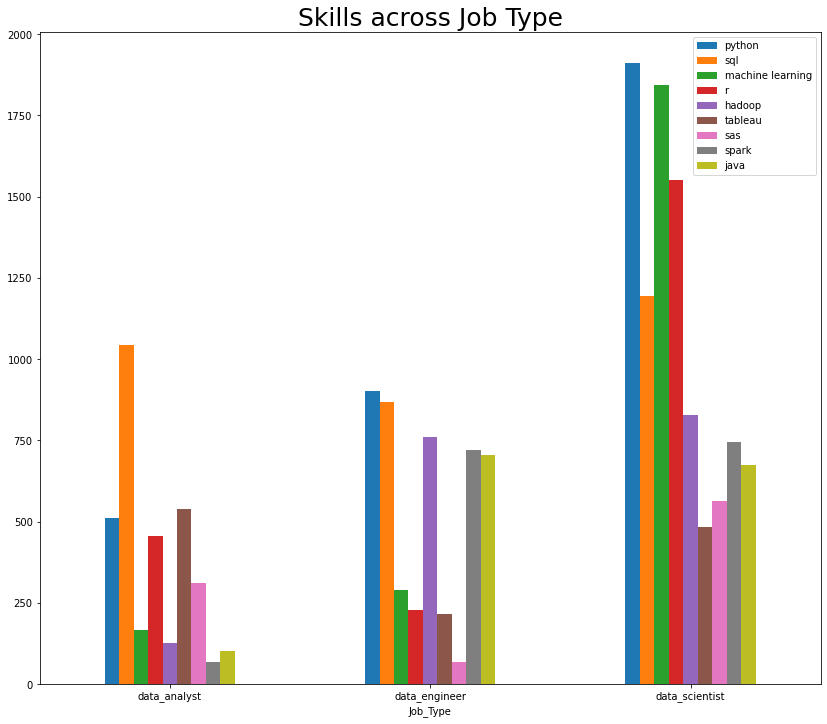

In [ ]:
#plotting bar graph for different skills across job type
jobs_across_type.sum().plot(kind='bar', figsize=(14,12))
plt.xticks(rotation='horizontal')
plt.title("Skills across Job Type",fontsize = 25)
plt.show()

# Top skills required for the role of Data Analyst

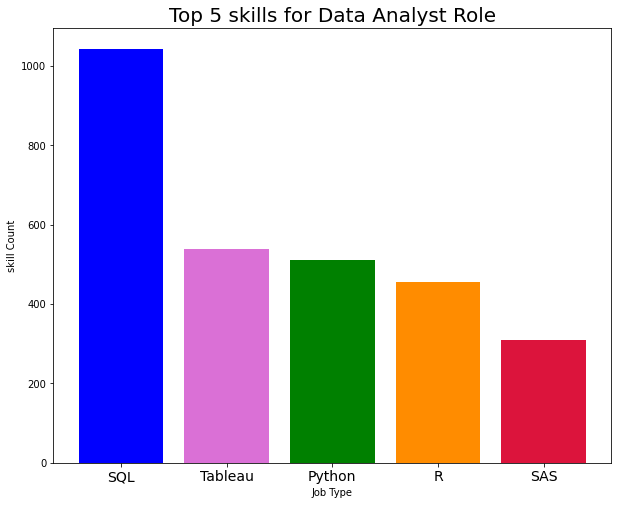

In [ ]:
#plot the bar graph for top 5 skills for the role of Data Analyst
da = [1044,538,512,456,310]
x = np.arange(len(da))
color = ['blue', 'orchid', 'green', 'darkorange', 'crimson']
fig = plt.figure(figsize=(10, 8))
plt.bar(x, da, color = color)
plt.xticks(x, ['SQL','Tableau', 'Python', 'R', 'SAS'], fontsize = 14)
plt.ylabel("skill Count")
plt.xlabel("Job Type")
plt.title("Top 5 skills for Data Analyst Role", fontsize = 20)
plt.show()

# Top skills required for the role of Data Scientist

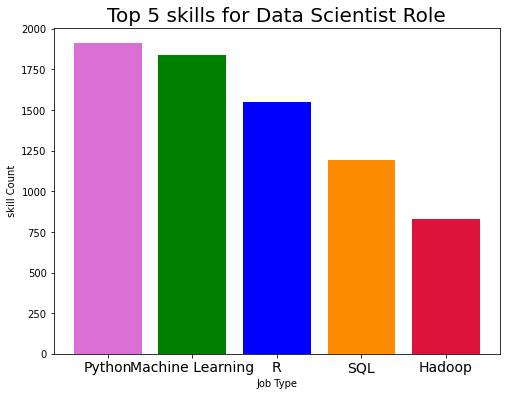

In [ ]:
ds = [1912, 1842, 1550, 1193, 827]
x = np.arange(len(ds))
color = ['orchid', 'green', 'blue', 'darkorange', 'crimson']
fig = plt.figure(figsize=(8,6))
plt.bar(x, ds, color = color)
plt.xticks(x, ['Python','Machine Learning', 'R', 'SQL', 'Hadoop'], fontsize = 14)
plt.ylabel("skill Count")
plt.xlabel("Job Type")
plt.title("Top 5 skills for Data Scientist Role", fontsize = 20)
plt.show()

# Top skills required for the role of Data Engineer

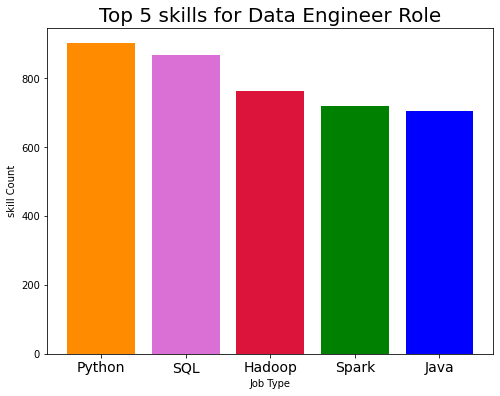

In [ ]:
de = [901, 867, 761, 719, 704]
x = np.arange(len(de))
color = ['darkorange', 'orchid','crimson', 'green', 'blue']
fig = plt.figure(figsize=(8,6))
plt.bar(x, de, color = color)
plt.xticks(x, ['Python', 'SQL', 'Hadoop', 'Spark', 'Java'], fontsize = 14)
plt.ylabel("skill Count")
plt.xlabel("Job Type")
plt.title("Top 5 skills for Data Engineer Role", fontsize = 20)
plt.show()

# Total Skills across all job types

In [ ]:
#creating a dataframe of the total skill counts across all job types
skills_count = jobs_across_type.sum().sum()
total_skill_count = pd.DataFrame([skills_count])
total_skill_count.index=['Total']
total_skill_count

,python,sql,machine learning,r,hadoop,tableau,sas,spark,java
Total,3325,3104,2297,2234,1714,1236,941,1531,1480


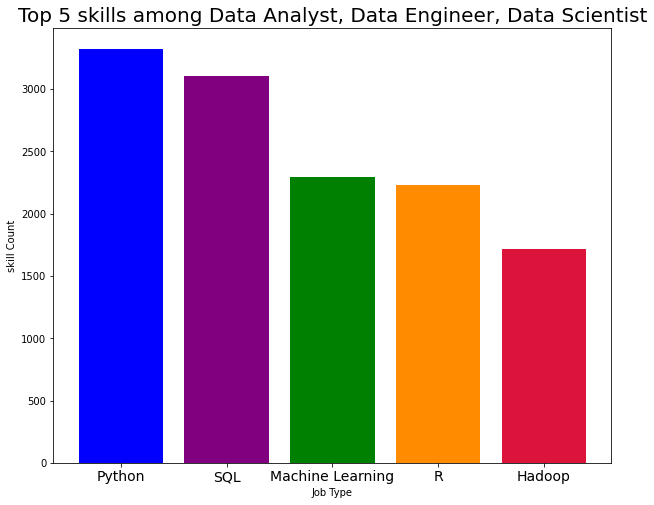

In [ ]:
#ploting the bar chart
total_skills = [3325, 3104, 2297, 2234, 1714]
width = 0.15
x = np.arange(len(total_skills))
color = ['blue', 'purple', 'green', 'darkorange', 'crimson']
fig = plt.figure(figsize=(10, 8))
plt.bar(x, total_skills, color = color)
plt.xticks(x, ['Python','SQL', 'Machine Learning', 'R', 'Hadoop'], fontsize = 14)
plt.ylabel("skill Count")
plt.xlabel("Job Type")
plt.title("Top 5 skills among Data Analyst, Data Engineer, Data Scientist", fontsize = 20)
plt.show()

# Relation between Job types, positions and Salaries

Grouping salaries into experience level such as Entry level, Mid Level, Senior Level

In [ ]:
#creating a dataframe for the skills per salary group
salary_group = pdInputData.set_index('Queried_Salary')
group_by_level = salary_group.loc[['<80000','80000-99999','100000-119999','120000-139999','140000-159999','>160000'],
                            ['python','sql','machine learning', 'r', 'hadoop', 'tableau', 'sas', 'spark', 'java']]
groups_by_level = group_by_level.groupby('Queried_Salary')
groups_by_level.sum()

,python,sql,machine learning,r,hadoop,tableau,sas,spark,java
Queried_Salary,,,,,,,,,
100000-119999,861,840,579,648,410,357,288,347,375
120000-139999,957,720,687,601,593,253,189,536,474
140000-159999,674,388,533,376,424,138,124,397,359
80000-99999,412,618,201,311,97,283,156,71,102
<80000,144,367,67,148,12,162,131,9,34
>160000,277,171,230,150,178,43,53,171,136


In [ ]:
#grouping and creating a dataframe for different job levels by skills
top_skills_by_job_level = pd.DataFrame({'Job Level':['Entry Level','Mid Level','Senior Level'],
                               'python':[556,1818,951], 'sql':[985,1560,559], 'machine learning':[268,1266,763],
                               'r':[459,1249,526], 'hadoop':[109,1003,602], 'tableau':[445,610,181],
                               'sas':[287,477,177], 'spark':[80,883,568], 'java':[136,849,495] }
                              )
top_skills_by_job_level = top_skills_by_job_level.set_index("Job Level")
top_skills_by_job_level

,python,sql,machine learning,r,hadoop,tableau,sas,spark,java
Job Level,,,,,,,,,
Entry Level,556,985,268,459,109,445,287,80,136
Mid Level,1818,1560,1266,1249,1003,610,477,883,849
Senior Level,951,559,763,526,602,181,177,568,495


Text(0.5, 1.0, 'Top 5 skills for Entry Level Job')

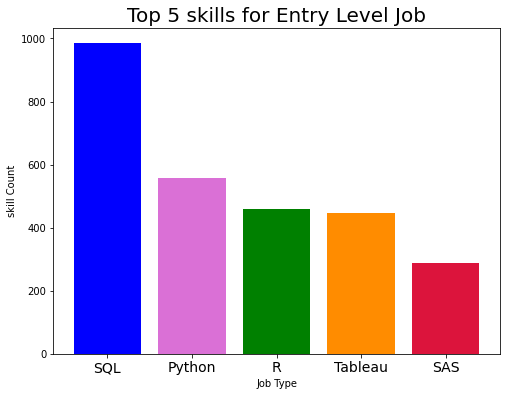

In [ ]:
#visualizing entry level job by skills using bar chart
entry_level = [985, 556, 459,  445, 287]
width = 0.15
x = np.arange(len(entry_level))
color = ['blue', 'orchid', 'green', 'darkorange', 'crimson']
fig = plt.figure(figsize=(8,6))
plt.bar(x, entry_level, color = color)
plt.xticks(x, ['SQL', 'Python', 'R', 'Tableau', 'SAS'], fontsize = 14)
plt.ylabel("skill Count")
plt.xlabel("Job Type")
plt.title("Top 5 skills for Entry Level Job", fontsize = 20)

Text(0.5, 1.0, 'Top 5 skills for Mid Level Job')

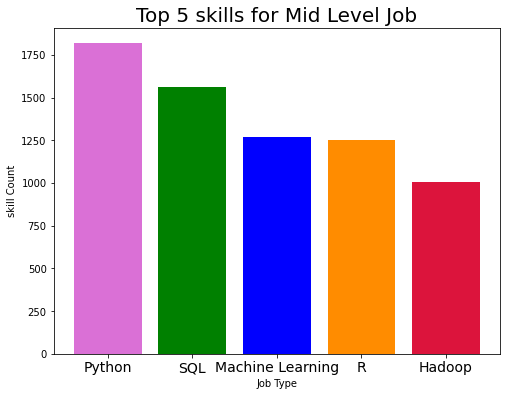

In [ ]:
#visualizing Mid level job by skills using bar chart
Mid_level = [1818, 1560, 1266, 1249, 1003]
x = np.arange(len(Mid_level))
color = ['orchid', 'green', 'blue', 'darkorange', 'crimson']
fig = plt.figure(figsize=(8,6))
plt.bar(x, Mid_level, color = color)
plt.xticks(x, ['Python', 'SQL', 'Machine Learning', 'R', 'Hadoop'], fontsize = 14)
plt.ylabel("skill Count")
plt.xlabel("Job Type")
plt.title("Top 5 skills for Mid Level Job", fontsize = 20)

Text(0.5, 1.0, 'Top 5 skills for Senior Level Job')

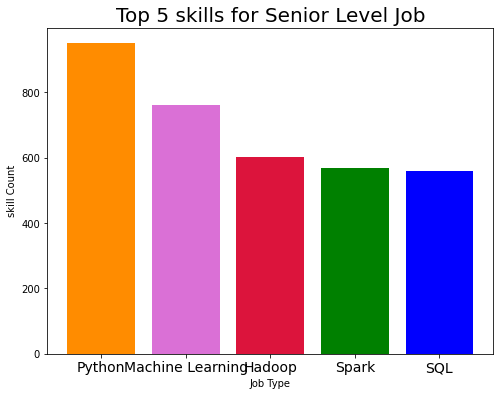

In [ ]:
#visualizing Senior level job by skills using bar chart
Senior_level = [951, 763, 602, 568, 559]
x = np.arange(len(Senior_level))
color = ['darkorange', 'orchid','crimson', 'green', 'blue']
fig = plt.figure(figsize=(8,6))
plt.bar(x, Senior_level, color = color)
plt.xticks(x, ['Python', 'Machine Learning', 'Hadoop', 'Spark', 'SQL'], fontsize = 14)
plt.ylabel("skill Count")
plt.xlabel("Job Type")
plt.title("Top 5 skills for Senior Level Job", fontsize = 20)

In [ ]:
#Replacing the Queied Salary with the mean value and creating a new column named Salary
pdInputData["Salary"] = pdInputData["Queried_Salary"].str.replace("<","").str.replace(">","").replace("80000-99999","84999").replace("100000-119999","109999").replace("120000-139999","129999").replace("140000-159999","149999")
pdInputData

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,Date_Since_Posted,Description,Location,Company_Revenue,Company_Employees,Company_Industry,python,sql,machine learning,r,hadoop,tableau,sas,spark,java,Others,CA,NY,VA,TX,MA,IL,WA,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries,Salary
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,1.0,"[<p><b>POSITION SUMMARY</b></p>, <p>\r\r\nThe ...",MO,More than $10B (USD),"10,000+",Health Care,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,80000
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,NaN,NaN,15.0,"[<p><b>What do we need?</b></p>, <ul><li>\r\r\...",TX,NaN,NaN,NaN,1,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,80000
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,62.0,3.5,1.0,"[<ul><li>Validate, analyze, and conduct statis...",OR,NaN,NaN,NaN,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,80000
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4.3,30.0,"[<p>Full time</p>, <p>Washington, DC metro are...",DC,NaN,NaN,Government,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,80000
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495.0,4.1,30.0,[<ul><li>Assist in consultations with business...,TX,NaN,"Less than 10,000",Banks and Financial Services,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,80000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5710,5710,Senior Data Engineer,https://www.indeed.com/rc/clk?jk=fbe2dd71643b3...,>160000,data_engineer,"['Hive', 'Hadoop', 'Oracle', 'SQL', 'HBase', '...",12,Intelliswift Software Inc,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,160000
5711,5711,"Principal Data Engineer (Java, Spark, Storm, AWS)",https://www.indeed.com/rc/clk?jk=70ee8b9bb5a2b...,>160000,data_engineer,"['Network', 'Scala', 'Kafka', 'Java', 'MongoDB...",8,Jobspring Partners,31.0,3.7,30.0,[<p>Want to change the world? How about contri...,CA,NaN,NaN,Human Resources and Staffing,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,160000
5712,5712,Executive Director- Architect: Data Engineerin...,https://www.indeed.com/rc/clk?jk=2c2a7f94f6ed1...,>160000,data_engineer,"['Spring', 'Data Management', 'Hadoop', 'Kafka...",13,JPMorgan Chase,21159.0,3.9,22.0,[<ul><li>Identify and solve hybrid cloud data ...,DE,More than $10B (USD),"10,000+",Banks and Financial Services,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,160000
5713,5713,"Senior Manager, Data Engineering (hands on)",https://www.indeed.com/rc/clk?jk=1051e100b300b...,>160000,data_engineer,"['Spring', 'Ruby', 'Test Automation', 'Scripti...",15,Capital One,6791.0,4.0,30.0,"[<p>At Capital One, we’re building a leading i...",NY,More than $10B (USD),"10,000+",Banks and Financial Services,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,160000


# Average Salary for Job Postings



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean Salary : 115956
Median Salary : 109999


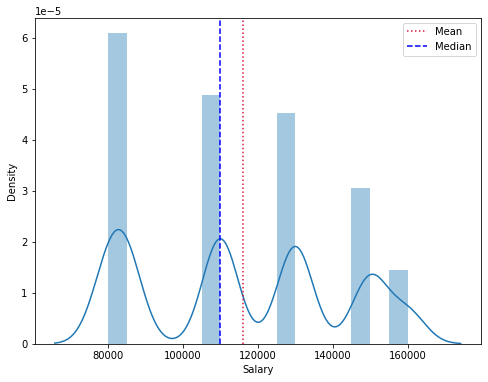

In [ ]:
#plotting the Distribution Plot  
fig = plt.figure(figsize=(8, 6))
sns.distplot(pdInputData["Salary"])
plt.axvline(round(np.mean(pdInputData["Salary"].astype(int))), label='Mean', linestyle=':', c='crimson')
plt.axvline(round(np.median(pdInputData["Salary"].astype(int))), label='Median', linestyle='dashed', c='blue')

#Print Mean and Median Salary for the Job Postings
print(f"Mean Salary : {round(np.mean(pdInputData['Salary'].astype(int)))}")
print(f"Median Salary : {round(np.median(pdInputData['Salary'].astype(int)))}")

plt.legend(loc='upper right')
plt.show()

The average salary for job posting is about 115956 per year.
Our distribution is slightly positively skewed, with a few outliers on the higher end, compared to a median of 109999.



# Locations by average salary

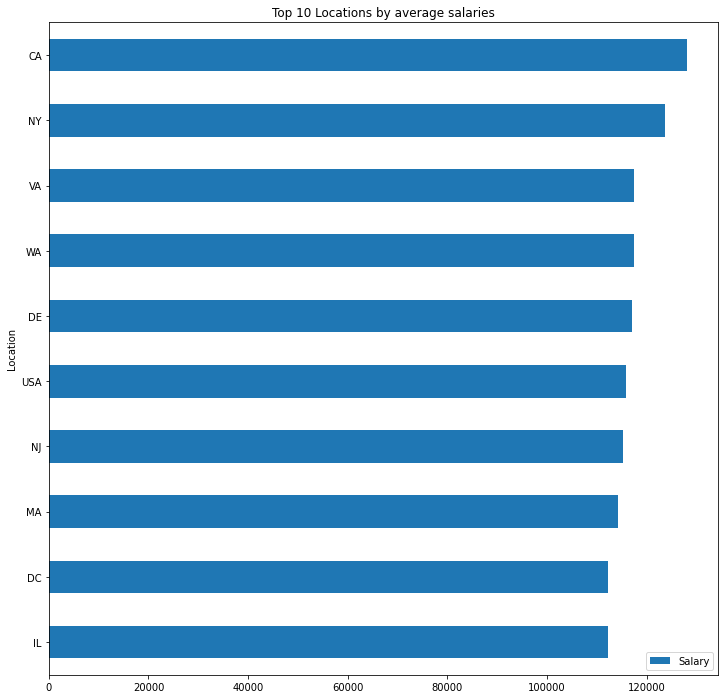

In [ ]:
#converting salary column to integer from string
pdInputData.Salary = pdInputData.Salary.astype(int)

#grouping by two columns Location and Salary and summarize by mean 
average_salary = pdInputData.groupby('Location')['Salary'].mean().sort_values(ascending = False)
average_salary_across_location = pd.DataFrame(average_salary)

#plotting horizontal bar plot of top 10 locations by average salary
average_salary_across_location.head(10).sort_values(by="Salary").plot.barh(figsize = (12,12), title = 'Top 10 Locations by average salaries')